# Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
import warnings 
warnings.filterwarnings('ignore')

# Reading the Data

In [3]:
data=pd.read_csv("WineQuality.csv")
data.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

# Describing the data 

In [4]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6044.000000       6045.000000  6050.000000     6051.000000   
mean        7.222675          0.336174     0.320069        5.494960   
std         1.297710          0.159591     0.144551        4.801128   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.200000   
max        15.900000          1.330000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6052.000000          6053.000000           6053.000000  6053.000000   
mean      0.056291            30.704940            116.095985     0.994759   
std       0.034668            17.156621             56.329437     0.002993   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             78.000000     0.992400   
50%       0.047000            29.000000            119.000000     0.994980   
75%       0.066000            42.000000            156.000000     0.997000   
max       0.611000           131.000000            344.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6044.000000  6050.000000  6053.000000  6053.000000  
mean      3.217500     0.532926    10.465055     5.825045  
std       0.159511     0.147679     1.175632     0.707775  
min       2.720000     0.220000     8.000000     5.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.205000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     1.980000    14.900000     7.000000

In [5]:
##Checking the distribution in each class in the target varibale

In [6]:
data['quality'].value_counts()

6    2836
5    2138
7    1079
Name: quality, dtype: int64

# Displaying the Columns in the dataframe

In [7]:
data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

# Checking for null values

In [8]:
data.isnull().sum()

type                    0
fixed acidity           9
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               1
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               3
alcohol                 0
quality                 0
dtype: int64

# Handling with null values

In [9]:
data.dropna(axis=0,inplace=True)

In [10]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Applying Label Encoding

In [11]:
le=preprocessing.LabelEncoder()
data['type']=le.fit_transform(data['type'])
data['type'].shape
# data['quality']=le.fit_transform(data['quality'])

(6022,)

# Correlation Plot

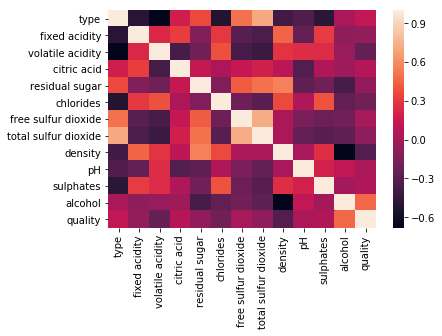

In [107]:
sns.heatmap(data.corr())
plt.show()

# Information on type of each attribute

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6022 entries, 0 to 6052
Data columns (total 13 columns):
type                    6022 non-null int32
fixed acidity           6022 non-null float64
volatile acidity        6022 non-null float64
citric acid             6022 non-null float64
residual sugar          6022 non-null float64
chlorides               6022 non-null float64
free sulfur dioxide     6022 non-null float64
total sulfur dioxide    6022 non-null float64
density                 6022 non-null float64
pH                      6022 non-null float64
sulphates               6022 non-null float64
alcohol                 6022 non-null float64
quality                 6022 non-null int64
dtypes: float64(11), int32(1), int64(1)
memory usage: 635.1 KB


In [14]:
##Defining the Categorical and Numerical attributes

In [16]:
df_cat=data.loc[:,['type','quality']]
df_num=data.loc[:,['alcohol','sulphates','pH','density','total sulfur dioxide','free sulfur dioxide','chlorides','residual sugar','citric acid','fixed acidity','volatile acidity']]
df_2=pd.concat([df_num,df_cat],axis=1)

In [17]:
df_2_num = df_2.drop(['type','quality'],axis=1)
df_2_cat = df_2.loc[:,['type','quality']]

# Standardization

In [18]:
Standardize=StandardScaler()
df_2_num_scaled=Standardize.fit_transform(df_2_num)
df_2_num_scaled=pd.DataFrame(df_2_num_scaled)

In [19]:
df_2_num_scaled.isnull().sum()
df_2_num_scaled.shape

(6022, 11)

In [20]:
##Indexing 

In [21]:
df_2_num_scaled.reset_index(drop=True, inplace=True)
df_cat.reset_index(drop=True, inplace=True)

In [22]:
df_3=pd.concat([df_2_num_scaled,df_cat],axis=1)
df_3.isnull().sum()

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
type       0
quality    0
dtype: int64

# Renaming the Columns

In [23]:
df_3.rename(columns = {0:'fixed acidity', 1:'volatile acidity', 2:'citric acid',3:'residual sugar',4:'chlorides',5:'free sulfur dioxide',6:'total sulfur dioxide',7:'density',8:'pH',9:'sulphates',10:'alcohol'},inplace=True)

# Splitting the data 

In [24]:
X=df_3.drop(columns=['quality'])
Y=df_3['quality']

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=123)

In [26]:
X_train.shape

(4817, 12)

In [27]:
X_test.shape

(1205, 12)

In [28]:
Y_train.shape

(4817,)

In [29]:
Y_test.shape

(1205,)

# Logistic Regression

In [31]:
Lr1=LogisticRegression(multi_class='multinomial',solver='lbfgs')
Lr1.fit(X_train,Y_train)
pred_Lr=Lr1.predict_proba(X_test)
pred_Lr

array([[0.44232555, 0.4834622 , 0.07421225],
       [0.74451172, 0.24137238, 0.0141159 ],
       [0.243308  , 0.59885399, 0.15783801],
       ...,
       [0.07433373, 0.51081779, 0.41484848],
       [0.5654909 , 0.39174381, 0.04276529],
       [0.02736307, 0.36521105, 0.60742588]])

# Calculating Bias_Square ,variance and error for Logistic Regression

In [33]:
def bias_square_calculations(Y_test,pred_Lr):
    bias_square=[]
    Y_test=list(Y_test)
    for i in range(len(Y_test)):
        position=int(Y_test[i])
        Class_1=0
        class_2=0
        class_3=0
        if position==5:
            Class_1=1
        if position==6:
            class_2=1
        if position==7:
            class_3=1
        first=(Class_1-pred_Lr[i][0])**2
        second=(class_2-pred_Lr[i][1])**2
        third=(class_3-pred_Lr[i][2])**2
        total=(first+second+third)*0.5
        bias_square.append(float(total))
    return bias_square

In [34]:
bias1=bias_square_calculations(Y_test,pred_Lr)
bias1

[0.27512197629589874,
 0.061867074621091415,
 0.12251487142188823,
 0.6721412343671034,
 0.1689651736740999,
 0.1237887715001076,
 0.20111755609693494,
 0.1888749405584845,
 0.40761125242905916,
 0.13132740689788866,
 0.23434624000778523,
 0.3218094009023968,
 0.14302280641691348,
 0.17176421823628477,
 0.23893178529143844,
 0.21954952021633148,
 0.1576576383522225,
 0.5087805551756419,
 0.31648802347780575,
 0.167571072237482,
 0.45217690420730705,
 0.6201726602582294,
 0.12079177722292893,
 0.14465977554725135,
 0.2811673522797672,
 0.15378034881428093,
 0.374190151561975,
 0.3080950523691909,
 0.5509731911767227,
 0.22031661943328812,
 0.22560771503231875,
 0.5177877612037207,
 0.15531873035299298,
 0.10773095612313727,
 0.36626822308895846,
 0.4099613646333004,
 0.05193089382783305,
 0.30752023447511034,
 0.6194391852994185,
 0.1316708418357853,
 0.14649752737083918,
 0.07882489236788053,
 0.13917840631711542,
 0.12202326408404235,
 0.5516802719235812,
 0.40734646887832116,
 0.1675

In [35]:
bias1=pd.DataFrame(bias1)
bias1
bias_1=bias1.rename({0:'Bias_Square'},axis=1)
bias_1

Bias_Square
0        0.275122
1        0.061867
2        0.122515
3        0.672141
4        0.168965
5        0.123789
6        0.201118
7        0.188875
8        0.407611
9        0.131327
10       0.234346
11       0.321809
12       0.143023
13       0.171764
14       0.238932
15       0.219550
16       0.157658
17       0.508781
18       0.316488
19       0.167571
20       0.452177
21       0.620173
22       0.120792
23       0.144660
24       0.281167
25       0.153780
26       0.374190
27       0.308095
28       0.550973
29       0.220317
...           ...
1175     0.418467
1176     0.158022
1177     0.741308
1178     0.592317
1179     0.142637
1180     0.232157
1181     0.408683
1182     0.067533
1183     0.241477
1184     0.339922
1185     0.201861
1186     0.151176
1187     0.605103
1188     0.423681
1189     0.502534
1190     0.287118
1191     0.260940
1192     0.061867
1193     0.138216
1194     0.293370
1195     0.183152
1196     0.122658
1197     0.530360
1198     0.235996
1199     0.172499
1200     0.155202
1201     0.143280
1202     0.208462
1203     0.694771
1204     0.144121

[1205 rows x 1 columns]

In [36]:
def variance(pred_Lr):
    variance=[]
    for i in range(len(pred_Lr)):
        total_sum=0
        for j in range(len(pred_Lr[i])):
            total_sum+=(pred_Lr[i][j])**2
        variance.append(((1-total_sum)*0.5))
    return variance

In [37]:
variance1=variance(pred_Lr)
variance1
variance1=pd.DataFrame(variance1)
variance1
variance_1=variance1.rename({0:'Variance'},axis=1)
variance_1

Variance
0     0.282552
1     0.193621
2     0.278631
3     0.272772
4     0.286404
5     0.282472
6     0.280189
7     0.263679
8     0.296433
9     0.283079
10    0.286190
11    0.280197
12    0.285544
13    0.289767
14    0.268443
15    0.266481
16    0.293815
17    0.282994
18    0.292164
19    0.298767
20    0.293953
21    0.275580
22    0.238295
23    0.294107
24    0.278415
25    0.294275
26    0.299522
27    0.274269
28    0.276142
29    0.291952
...        ...
1175  0.281032
1176  0.281727
1177  0.233631
1178  0.294971
1179  0.286919
1180  0.278866
1181  0.281699
1182  0.194386
1183  0.280183
1184  0.253072
1185  0.313663
1186  0.283049
1187  0.278027
1188  0.296512
1189  0.283094
1190  0.274874
1191  0.292597
1192  0.193621
1193  0.290342
1194  0.269896
1195  0.292190
1196  0.279635
1197  0.292803
1198  0.268624
1199  0.262313
1200  0.258910
1201  0.267443
1202  0.280720
1203  0.262464
1204  0.248453

[1205 rows x 1 columns]

In [38]:
error1= [bias1[0].iloc[i]+variance1[0].iloc[i] for i in range(len(bias1))]
error1
error1=pd.DataFrame(error1)
error1
error_1=error1.rename({0:'Error'},axis=1)
error_1

Error
0     0.557674
1     0.255488
2     0.401146
3     0.944914
4     0.455370
5     0.406260
6     0.481306
7     0.452554
8     0.704044
9     0.414407
10    0.520536
11    0.602006
12    0.428567
13    0.461531
14    0.507374
15    0.486031
16    0.451472
17    0.791775
18    0.608652
19    0.466338
20    0.746130
21    0.895753
22    0.359086
23    0.438767
24    0.559583
25    0.448056
26    0.673712
27    0.582364
28    0.827115
29    0.512269
...        ...
1175  0.699499
1176  0.439749
1177  0.974939
1178  0.887288
1179  0.429556
1180  0.511023
1181  0.690382
1182  0.261919
1183  0.521660
1184  0.592994
1185  0.515524
1186  0.434225
1187  0.883129
1188  0.720193
1189  0.785629
1190  0.561992
1191  0.553537
1192  0.255488
1193  0.428558
1194  0.563266
1195  0.475342
1196  0.402292
1197  0.823163
1198  0.504619
1199  0.434812
1200  0.414112
1201  0.410723
1202  0.489182
1203  0.957235
1204  0.392574

[1205 rows x 1 columns]

# Alternate method for error 

In [39]:
# error1 = bias1[0]+variance1[0]

In [41]:
##Converting array(pred_Lr) to Dataframe

In [42]:
pred_Lr=pd.DataFrame(pred_Lr)

# Concatenation

In [43]:
pred_Lr['Actual'] = df_3['quality']
pred_Lr_final=pd.concat([pred_Lr,bias_1,variance_1,error_1],axis=1,ignore_index=False)
pred_Lr_final.head()

0         1         2  Actual  Bias_Square  Variance     Error
0  0.442326  0.483462  0.074212       6     0.275122  0.282552  0.557674
1  0.744512  0.241372  0.014116       6     0.061867  0.193621  0.255488
2  0.243308  0.598854  0.157838       6     0.122515  0.278631  0.401146
3  0.522405  0.422509  0.055086       6     0.672141  0.272772  0.944914
4  0.343633  0.544630  0.111736       6     0.168965  0.286404  0.455370

# Getting the csv file with all the predictions

In [44]:
# pred_Lr_final.to_csv('Logistic_Regression2.csv',header=True,index=False)

# Decision Tree Classifier

In [45]:
DT=DecisionTreeClassifier(random_state=0,max_depth=7)
DT.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [46]:
pred_DT_test=DT.predict(X_test)
pred_DT_test

array([6, 5, 6, ..., 6, 5, 7], dtype=int64)

In [47]:
pred_DT=DT.predict_proba(X_test)

# Accuracy and Classification Report 

In [48]:
print("classification_report : ",classification_report(Y_test,pred_DT_test)) 
print("accuracy_score : ",accuracy_score(Y_test,pred_DT_test)) 

classification_report :                precision    recall  f1-score   support

           5       0.65      0.62      0.63       393
           6       0.61      0.70      0.65       593
           7       0.49      0.34      0.40       219

   micro avg       0.61      0.61      0.61      1205
   macro avg       0.58      0.55      0.56      1205
weighted avg       0.60      0.61      0.60      1205

accuracy_score :  0.6058091286307054


In [49]:
##Calculating Bias_Square,variance and error for Decision Tree Classifier

In [50]:
def bias_square_calculations(Y_test,pred_DT):
    bias_square=[]
    Y_test=list(Y_test)
    for i in range(len(Y_test)):
        position=int(Y_test[i])
        Class_1=0
        class_2=0
        class_3=0
        if position==5:
            Class_1=1
        if position==6:
            class_2=1
        if position==7:
            class_3=1
        first=(Class_1-pred_DT[i][0])**2
        second=(class_2-pred_DT[i][1])**2
        third=(class_3-pred_DT[i][2])**2
        total=(first+second+third)*0.5
        bias_square.append(float(total))
    return bias_square

In [51]:
bias2=bias_square_calculations(Y_test,pred_DT)
bias2
bias2=pd.DataFrame(bias2)
bias_2=bias2.rename({0:'Bias_square'},axis=1)
bias_2

Bias_square
0        0.511547
1        0.049487
2        0.159329
3        0.602538
4        0.113489
5        0.045211
6        0.104915
7        0.499527
8        0.499527
9        0.159329
10       0.261920
11       0.228590
12       0.261920
13       0.104915
14       0.518136
15       0.007412
16       0.081095
17       0.427006
18       0.240941
19       0.104915
20       0.070000
21       0.752066
22       0.000000
23       0.113489
24       0.097500
25       0.162992
26       0.724444
27       0.008264
28       0.499527
29       0.369474
...           ...
1175     0.427006
1176     0.104915
1177     0.815819
1178     0.762913
1179     1.000000
1180     0.057778
1181     0.427006
1182     0.007412
1183     0.104915
1184     0.000000
1185     0.351108
1186     0.001479
1187     0.602538
1188     0.511547
1189     0.517915
1190     0.239450
1191     0.239450
1192     0.049487
1193     0.081095
1194     0.369474
1195     0.000000
1196     0.104915
1197     0.517915
1198     0.351108
1199     0.062044
1200     0.433702
1201     1.000000
1202     0.162992
1203     0.767544
1204     0.166898

[1205 rows x 1 columns]

In [52]:
def variance(pred_DT):
    variance=[]
    for i in range(len(pred_DT)):
        total_sum=0
        for j in range(len(pred_DT[i])):
            total_sum+=(pred_DT[i][j])**2
        variance.append(((1-total_sum)*0.5))
    return variance

In [53]:
variance2=variance(pred_DT)
variance2
variance2=pd.DataFrame(variance2)
variance2
variance_2=variance2.rename({0:'Variance'},axis=1)
variance_2

Variance
0     0.274861
1     0.176643
2     0.298583
3     0.264340
4     0.274861
5     0.198691
6     0.264340
7     0.264340
8     0.264340
9     0.298583
10    0.269549
11    0.315528
12    0.269549
13    0.264340
14    0.249159
15    0.078681
16    0.214360
17    0.298583
18    0.269549
19    0.264340
20    0.230000
21    0.157025
22    0.000000
23    0.274861
24    0.252500
25    0.268587
26    0.208889
27    0.082645
28    0.264340
29    0.274091
...        ...
1175  0.298583
1176  0.264340
1177  0.176643
1178  0.214360
1179  0.000000
1180  0.208889
1181  0.298583
1182  0.078681
1183  0.264340
1184  0.000000
1185  0.254155
1186  0.036982
1187  0.264340
1188  0.274861
1189  0.298583
1190  0.255174
1191  0.255174
1192  0.176643
1193  0.214360
1194  0.274091
1195  0.000000
1196  0.264340
1197  0.298583
1198  0.254155
1199  0.194238
1200  0.274631
1201  0.000000
1202  0.268587
1203  0.197368
1204  0.254155

[1205 rows x 1 columns]

In [54]:
error2= [bias2[0].iloc[i]+variance2[0].iloc[i] for i in range(len(bias2))]
error2
error2=pd.DataFrame(error2)
error2
error_2=error2.rename({0:'Error'},axis=1)
error_2

Error
0     0.786408
1     0.226131
2     0.457912
3     0.866878
4     0.388350
5     0.243902
6     0.369255
7     0.763867
8     0.763867
9     0.457912
10    0.531469
11    0.544118
12    0.531469
13    0.369255
14    0.767296
15    0.086093
16    0.295455
17    0.725589
18    0.510490
19    0.369255
20    0.300000
21    0.909091
22    0.000000
23    0.388350
24    0.350000
25    0.431579
26    0.933333
27    0.090909
28    0.763867
29    0.643564
...        ...
1175  0.725589
1176  0.369255
1177  0.992462
1178  0.977273
1179  1.000000
1180  0.266667
1181  0.725589
1182  0.086093
1183  0.369255
1184  0.000000
1185  0.605263
1186  0.038462
1187  0.866878
1188  0.786408
1189  0.816498
1190  0.494624
1191  0.494624
1192  0.226131
1193  0.295455
1194  0.643564
1195  0.000000
1196  0.369255
1197  0.816498
1198  0.605263
1199  0.256281
1200  0.708333
1201  1.000000
1202  0.431579
1203  0.964912
1204  0.421053

[1205 rows x 1 columns]

In [55]:
##Converting the array to a Dataframe

In [56]:
pred_DT=pd.DataFrame(pred_DT)
pred_DT
pred_DT['Actual'] = df_3['quality']
pred_DT

0         1         2  Actual
0     0.213592  0.611650  0.174757       6
1     0.773869  0.218593  0.007538       6
2     0.183502  0.542088  0.274411       6
3     0.236133  0.630745  0.133122       6
4     0.213592  0.611650  0.174757       6
5     0.146341  0.756098  0.097561       6
6     0.236133  0.630745  0.133122       6
7     0.236133  0.630745  0.133122       6
8     0.236133  0.630745  0.133122       6
9     0.183502  0.542088  0.274411       6
10    0.489510  0.468531  0.041958       5
11    0.455882  0.352941  0.191176       5
12    0.489510  0.468531  0.041958       5
13    0.236133  0.630745  0.133122       7
14    0.106918  0.660377  0.232704       5
15    0.913907  0.086093  0.000000       7
16    0.272727  0.704545  0.022727       6
17    0.183502  0.542088  0.274411       6
18    0.489510  0.468531  0.041958       5
19    0.236133  0.630745  0.133122       7
20    0.100000  0.200000  0.700000       5
21    0.090909  0.818182  0.090909       6
22    1.000000  0.000000  0.000000       6
23    0.213592  0.611650  0.174757       6
24    0.100000  0.250000  0.650000       6
25    0.063158  0.568421  0.368421       6
26    0.066667  0.733333  0.200000       7
27    0.000000  0.090909  0.909091       6
28    0.236133  0.630745  0.133122       6
29    0.079208  0.356436  0.564356       6
...        ...       ...       ...     ...
1175  0.183502  0.542088  0.274411       5
1176  0.236133  0.630745  0.133122       5
1177  0.773869  0.218593  0.007538       6
1178  0.272727  0.704545  0.022727       6
1179  1.000000  0.000000  0.000000       6
1180  0.066667  0.733333  0.200000       5
1181  0.183502  0.542088  0.274411       6
1182  0.913907  0.086093  0.000000       5
1183  0.236133  0.630745  0.133122       6
1184  0.000000  1.000000  0.000000       6
1185  0.026316  0.394737  0.578947       6
1186  0.038462  0.961538  0.000000       5
1187  0.236133  0.630745  0.133122       6
1188  0.213592  0.611650  0.174757       7
1189  0.183502  0.542088  0.274411       6
1190  0.483871  0.505376  0.010753       6
1191  0.483871  0.505376  0.010753       6
1192  0.773869  0.218593  0.007538       5
1193  0.272727  0.704545  0.022727       5
1194  0.079208  0.356436  0.564356       6
1195  0.000000  1.000000  0.000000       7
1196  0.236133  0.630745  0.133122       6
1197  0.183502  0.542088  0.274411       6
1198  0.026316  0.394737  0.578947       5
1199  0.743719  0.241206  0.015075       5
1200  0.291667  0.593750  0.114583       6
1201  0.000000  0.000000  1.000000       6
1202  0.063158  0.568421  0.368421       5
1203  0.745614  0.219298  0.035088       6
1204  0.026316  0.394737  0.578947       6

[1205 rows x 4 columns]

# Concatenation

In [63]:
pred_DT_final=pd.concat([pred_DT,bias_2,variance_2,error_2],axis=1,ignore_index=False)
pred_DT_final.head()

0         1         2  Actual  Bias_square  Variance     Error
0  0.213592  0.611650  0.174757       6     0.511547  0.274861  0.786408
1  0.773869  0.218593  0.007538       6     0.049487  0.176643  0.226131
2  0.183502  0.542088  0.274411       6     0.159329  0.298583  0.457912
3  0.236133  0.630745  0.133122       6     0.602538  0.264340  0.866878
4  0.213592  0.611650  0.174757       6     0.113489  0.274861  0.388350

# Getting the csv file with all the predictions.

In [64]:
# pred_DT_final.to_csv('Decision_Tree6.csv',header=True,index=False)

# Random Forest Classifier

In [65]:
Rf=RandomForestClassifier(max_depth=7)
Rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
A=Rf.predict_proba(X_test)

# Calculating Bias_square,Variance and error for Random Forest Classifier

In [68]:
def bias_square_calculations(Y_test,A):
    bias_square=[]
    Y_test=list(Y_test)
    for i in range(len(Y_test)):
        position=int(Y_test[i])
        Class_1=0
        class_2=0
        class_3=0
        if position==5:
            Class_1=1
        if position==6:
            class_2=1
        if position==7:
            class_3=1
        first=(Class_1-A[i][0])**2
        second=(class_2-A[i][1])**2
        third=(class_3-A[i][2])**2
        total=(first+second+third)*0.5
        bias_square.append(float(total))
    return bias_square

In [69]:
bias3=bias_square_calculations(Y_test,A)
bias3
bias3=pd.DataFrame(bias3)
bias_3=bias3.rename({0:'Bias_square'},axis=1)
bias_3

Bias_square
0        0.351357
1        0.064145
2        0.183748
3        0.385030
4        0.226380
5        0.160544
6        0.144358
7        0.609578
8        0.457166
9        0.168519
10       0.290030
11       0.250973
12       0.210221
13       0.110445
14       0.454880
15       0.292068
16       0.189427
17       0.334831
18       0.421983
19       0.114819
20       0.381200
21       0.443788
22       0.185565
23       0.267299
24       0.322984
25       0.300396
26       0.524831
27       0.227772
28       0.553336
29       0.165343
...           ...
1175     0.425680
1176     0.016854
1177     0.740311
1178     0.675109
1179     0.225641
1180     0.150287
1181     0.541368
1182     0.155355
1183     0.084086
1184     0.485319
1185     0.158836
1186     0.165333
1187     0.534003
1188     0.311624
1189     0.431466
1190     0.271897
1191     0.252416
1192     0.064145
1193     0.115550
1194     0.207105
1195     0.230179
1196     0.100890
1197     0.548985
1198     0.207068
1199     0.092048
1200     0.288975
1201     0.225247
1202     0.233814
1203     0.531288
1204     0.061625

[1205 rows x 1 columns]

In [72]:
def variance(A):
    variance=[]
    for i in range(len(A)):
        total_sum=0
        for j in range(len(A[i])):
            total_sum+=(A[i][j])**2
        variance.append(((1-total_sum)*0.5))
    return variance
variance3=variance(A)
variance3
variance3=pd.DataFrame(variance3)
variance3
variance_3=variance3.rename({0:'Variance'},axis=1)
variance_3

Variance
0     0.281138
1     0.193547
2     0.281099
3     0.314059
4     0.295597
5     0.295601
6     0.271200
7     0.235854
8     0.291393
9     0.289750
10    0.280814
11    0.279508
12    0.292502
13    0.273214
14    0.315101
15    0.272712
16    0.311256
17    0.307603
18    0.278359
19    0.267979
20    0.297913
21    0.277326
22    0.275952
23    0.322513
24    0.300838
25    0.310325
26    0.295911
27    0.282419
28    0.280323
29    0.287965
...        ...
1175  0.291644
1176  0.124022
1177  0.240370
1178  0.272939
1179  0.307881
1180  0.293771
1181  0.283175
1182  0.261187
1183  0.239070
1184  0.217965
1185  0.300927
1186  0.284530
1187  0.289668
1188  0.324871
1189  0.304512
1190  0.274626
1191  0.274374
1192  0.193547
1193  0.276793
1194  0.282774
1195  0.286184
1196  0.246305
1197  0.291117
1198  0.266768
1199  0.224113
1200  0.277086
1201  0.312776
1202  0.302558
1203  0.308341
1204  0.196813

[1205 rows x 1 columns]

In [73]:
error3= [bias3[0].iloc[i]+variance3[0].iloc[i] for i in range(len(bias3))]
error3
error3=pd.DataFrame(error3)
error3
error_3=error3.rename({0:'Error'},axis=1)
error_3

Error
0     0.632494
1     0.257692
2     0.464847
3     0.699089
4     0.521977
5     0.456145
6     0.415559
7     0.845432
8     0.748559
9     0.458268
10    0.570844
11    0.530481
12    0.502722
13    0.383659
14    0.769981
15    0.564779
16    0.500683
17    0.642434
18    0.700341
19    0.382798
20    0.679113
21    0.721114
22    0.461517
23    0.589812
24    0.623822
25    0.610721
26    0.820743
27    0.510191
28    0.833660
29    0.453308
...        ...
1175  0.717324
1176  0.140876
1177  0.980681
1178  0.948048
1179  0.533522
1180  0.444058
1181  0.824543
1182  0.416542
1183  0.323155
1184  0.703284
1185  0.459763
1186  0.449864
1187  0.823671
1188  0.636494
1189  0.735978
1190  0.546523
1191  0.526790
1192  0.257692
1193  0.392343
1194  0.489879
1195  0.516362
1196  0.347195
1197  0.840102
1198  0.473836
1199  0.316162
1200  0.566062
1201  0.538023
1202  0.536372
1203  0.839629
1204  0.258438

[1205 rows x 1 columns]

# Converting the array to a Dataframe

In [74]:
A=pd.DataFrame(A)

# Concatenation 

In [75]:
A_final=pd.concat([error_3,bias_3,variance_3,A],axis=1)
A_final.head(0)

Empty DataFrame
Columns: [Error, Bias_square, Variance, 0, 1, 2]
Index: []

In [76]:
##Getting the csv file with all predictions

In [77]:
# A_final.to_csv('Random_Forest.csv',header=True,index=False)

# KNN Classifier

In [79]:
Knn=KNeighborsClassifier()
Knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

# Calculating the Bias_Square,variance and error for KNN Classifier

In [80]:
b=Knn.predict_proba(X_test)
b
def bias_square_calculations(Y_test,b):
    bias_square=[]
    Y_test=list(Y_test)
    for i in range(len(Y_test)):
        position=int(Y_test[i])
        Class_1=0
        class_2=0
        class_3=0
        if position==5:
            Class_1=1
        if position==6:
            class_2=1
        if position==7:
            class_3=1
        first=(Class_1-b[i][0])**2
        second=(class_2-b[i][1])**2
        third=(class_3-b[i][2])**2
        total=(first+second+third)*0.5
        bias_square.append(float(total))
    return bias_square

In [81]:
bias4=bias_square_calculations(Y_test,b)
bias4
bias4=pd.DataFrame(bias4)
bias_4=bias4.rename({0:'Bias_square'},axis=1)
bias_4

Bias_square
0            0.36
1            0.04
2            0.04
3            0.04
4            0.16
5            0.04
6            0.00
7            0.16
8            0.84
9            0.00
10           0.52
11           0.28
12           0.16
13           0.16
14           0.52
15           0.04
16           0.00
17           0.28
18           0.64
19           0.00
20           0.04
21           0.28
22           0.04
23           0.12
24           0.04
25           0.36
26           0.64
27           0.04
28           0.16
29           0.64
...           ...
1175         0.64
1176         0.00
1177         0.76
1178         1.00
1179         0.28
1180         0.00
1181         0.48
1182         0.64
1183         0.16
1184         0.36
1185         0.36
1186         0.04
1187         0.76
1188         0.64
1189         0.52
1190         0.12
1191         0.16
1192         0.04
1193         0.12
1194         0.04
1195         0.64
1196         0.04
1197         0.84
1198         0.16
1199         0.00
1200         0.52
1201         0.04
1202         0.28
1203         0.36
1204         0.04

[1205 rows x 1 columns]

In [82]:
def variance(b):
    variance=[]
    for i in range(len(b)):
        total_sum=0
        for j in range(len(b[i])):
            total_sum+=(b[i][j])**2
        variance.append(((1-total_sum)*0.5))
    return variance
variance4=variance(b)
variance4
variance4=pd.DataFrame(variance4)
variance4
variance_4=variance4.rename({0:'Variance'},axis=1)
variance_4

Variance
0         0.24
1         0.16
2         0.16
3         0.16
4         0.24
5         0.16
6         0.00
7         0.24
8         0.16
9         0.00
10        0.28
11        0.32
12        0.24
13        0.24
14        0.28
15        0.16
16        0.00
17        0.32
18        0.16
19        0.00
20        0.16
21        0.32
22        0.16
23        0.28
24        0.16
25        0.24
26        0.16
27        0.16
28        0.24
29        0.16
...        ...
1175      0.16
1176      0.00
1177      0.24
1178      0.00
1179      0.32
1180      0.00
1181      0.32
1182      0.16
1183      0.24
1184      0.24
1185      0.24
1186      0.16
1187      0.24
1188      0.16
1189      0.28
1190      0.28
1191      0.24
1192      0.16
1193      0.28
1194      0.16
1195      0.16
1196      0.16
1197      0.16
1198      0.24
1199      0.00
1200      0.28
1201      0.16
1202      0.32
1203      0.24
1204      0.16

[1205 rows x 1 columns]

In [83]:
error4= [bias4[0].iloc[i]+variance4[0].iloc[i] for i in range(len(bias4))]
error4
error4=pd.DataFrame(error4)
error4
error_4=error4.rename({0:'Error'},axis=1)
error_4

Error
0       0.6
1       0.2
2       0.2
3       0.2
4       0.4
5       0.2
6       0.0
7       0.4
8       1.0
9       0.0
10      0.8
11      0.6
12      0.4
13      0.4
14      0.8
15      0.2
16      0.0
17      0.6
18      0.8
19      0.0
20      0.2
21      0.6
22      0.2
23      0.4
24      0.2
25      0.6
26      0.8
27      0.2
28      0.4
29      0.8
...     ...
1175    0.8
1176    0.0
1177    1.0
1178    1.0
1179    0.6
1180    0.0
1181    0.8
1182    0.8
1183    0.4
1184    0.6
1185    0.6
1186    0.2
1187    1.0
1188    0.8
1189    0.8
1190    0.4
1191    0.4
1192    0.2
1193    0.4
1194    0.2
1195    0.8
1196    0.2
1197    1.0
1198    0.4
1199    0.0
1200    0.8
1201    0.2
1202    0.6
1203    0.6
1204    0.2

[1205 rows x 1 columns]

# Converting the array to an Dataframe and Concatenation

In [87]:
b=pd.DataFrame(b)
knn_final=pd.concat([b,error_4,bias_4,variance_4],axis=1)
knn_final.head()

0    1    2  Error  Bias_square  Variance
0  0.4  0.6  0.0    0.6         0.36      0.24
1  0.8  0.2  0.0    0.2         0.04      0.16
2  0.2  0.8  0.0    0.2         0.04      0.16
3  0.0  0.2  0.8    0.2         0.04      0.16
4  0.0  0.6  0.4    0.4         0.16      0.24

In [88]:
knn_final['Actual'] = df_3['quality']

# Getting the csv file with all predictions

In [562]:
# knn_final.to_csv('Knn2.csv',header=True,index=False)

In [90]:
##Support vector Classifier

In [91]:
from sklearn import svm

In [92]:
clf = svm.SVC()

In [93]:
clf=svm.SVC(probability=True)

In [94]:
clf.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [95]:
svm_pred=clf.predict_proba(X_test)

# Calculating Bias_Square,variance and error for Support Vector Classifier

In [97]:
def bias_square_calculations(Y_test,svm_pred):
    bias_square=[]
    Y_test=list(Y_test)
    for i in range(len(Y_test)):
        position=int(Y_test[i])
        Class_1=0
        class_2=0
        class_3=0
        if position==5:
            Class_1=1
        if position==6:
            class_2=1
        if position==7:
            class_3=1
        first=(Class_1-svm_pred[i][0])**2
        second=(class_2-svm_pred[i][1])**2
        third=(class_3-svm_pred[i][2])**2
        total=(first+second+third)*0.5
        bias_square.append(float(total))
    return bias_square

In [98]:
bias5=bias_square_calculations(Y_test,svm_pred)
bias5
bias5=pd.DataFrame(bias5)
bias_5=bias5.rename({0:'Bias_square'},axis=1)
bias_5.head()

Bias_square
0     0.169967
1     0.037680
2     0.094334
3     0.478621
4     0.125653

In [99]:
def variance(svm_pred):
    variance=[]
    for i in range(len(svm_pred)):
        total_sum=0
        for j in range(len(svm_pred[i])):
            total_sum+=(svm_pred[i][j])**2
        variance.append(((1-total_sum)*0.5))
    return variance
variance5=variance(svm_pred)
variance5
variance5=pd.DataFrame(variance5)
variance5
variance_5=variance5.rename({0:'Variance'},axis=1)
variance_5.head()

Variance
0  0.277121
1  0.166562
2  0.260167
3  0.312727
4  0.270510

In [100]:
error5= [bias5[0].iloc[i]+variance5[0].iloc[i] for i in range(len(bias5))]
error5
error5=pd.DataFrame(error5)
error5
error_5=error5.rename({0:'Error'},axis=1)
error_5

Error
0     0.447088
1     0.204243
2     0.354501
3     0.791348
4     0.396163
5     0.306310
6     0.371422
7     0.579343
8     0.733923
9     0.271704
10    0.437314
11    0.695844
12    0.401445
13    0.373564
14    0.652188
15    0.388140
16    0.325955
17    0.805299
18    0.653471
19    0.307589
20    0.665656
21    0.744141
22    0.271421
23    0.405078
24    0.592911
25    0.543502
26    0.907679
27    0.343905
28    0.892911
29    0.586271
...        ...
1175  0.826003
1176  0.271461
1177  0.933162
1178  0.805604
1179  0.516569
1180  0.303977
1181  0.769177
1182  0.791498
1183  0.490942
1184  0.585886
1185  0.479243
1186  0.312319
1187  0.890662
1188  0.861357
1189  0.754868
1190  0.674270
1191  0.335739
1192  0.204243
1193  0.313673
1194  0.365379
1195  0.518300
1196  0.298507
1197  0.927442
1198  0.381879
1199  0.376698
1200  0.534542
1201  0.477118
1202  0.444112
1203  0.896071
1204  0.111338

[1205 rows x 1 columns]

# Converting array to a Dataframe and Concatenation

In [101]:
svm_pred=pd.DataFrame(svm_pred)
svm_final=pd.concat([svm_pred,bias_5,variance_5,error_5],axis=1)

In [102]:
svm_final['Actual'] = df_3['quality']

In [104]:
##Getting the csv file with all predictions 

In [112]:
# svm_final.to_csv('SVC1.csv',header=True,index=False)

# Displaying the results

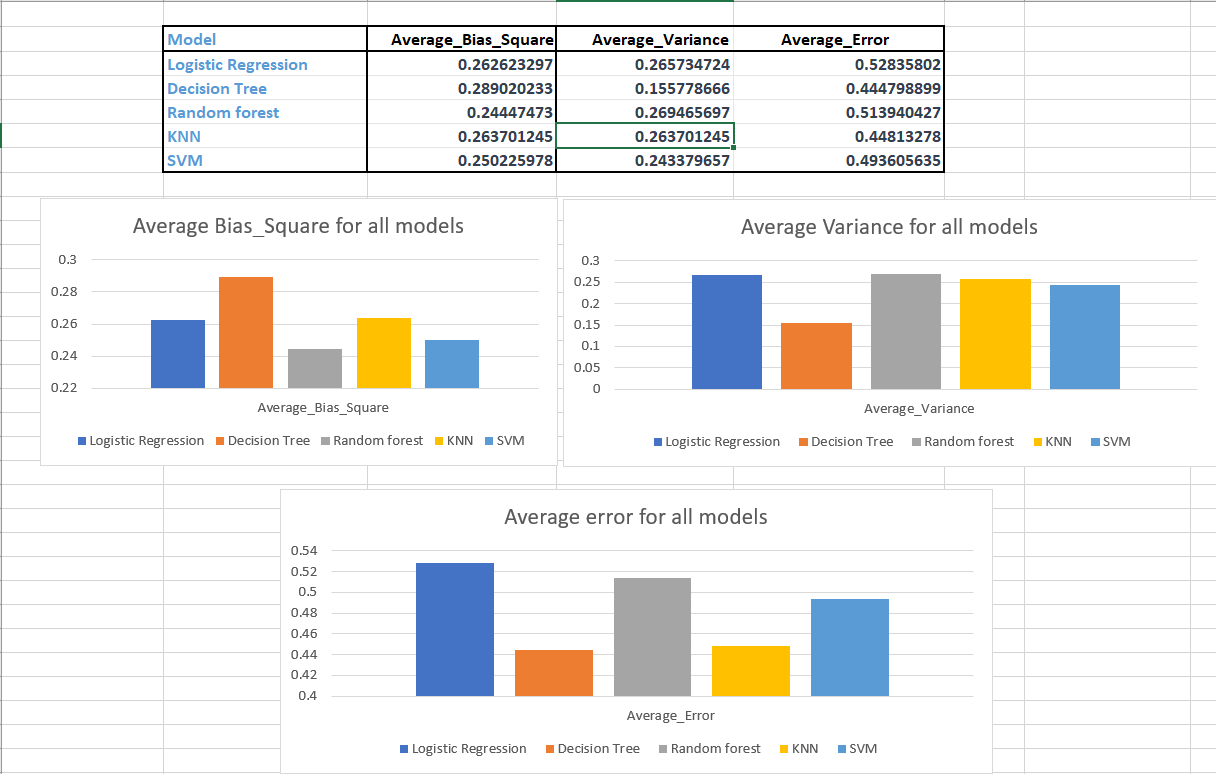

In [123]:
from IPython.display import Image
Image("Image_1.PNG")